In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('../data/data_globant.csv')

In [6]:
data.head()

,Date,Email,Name,Position,Seniority,Location,Studio,Client,Client Tag,Project,Project Tag,Team Name,Engagement,Email Leader,Year,Month,Day
0,02Jan23,natalia.ramirez@tec.globant.com,Natalia Ramírez,Software Developer,Jr,CO/ANT/MED,Engineering,GreenWave Innovations,GWI001,Atlas Initiative,ATLINT,Breaking Badger,3.04,laura.leon@tec.globant.com,2023,1,2
1,03Jan23,natalia.ramirez@tec.globant.com,Natalia Ramírez,Software Developer,Jr,CO/ANT/MED,Engineering,GreenWave Innovations,GWI001,Atlas Initiative,ATLINT,Breaking Badger,2.99,laura.leon@tec.globant.com,2023,1,3
2,04Jan23,natalia.ramirez@tec.globant.com,Natalia Ramírez,Software Developer,Jr,CO/ANT/MED,Engineering,GreenWave Innovations,GWI001,Atlas Initiative,ATLINT,Breaking Badger,2.97,laura.leon@tec.globant.com,2023,1,4
3,05Jan23,natalia.ramirez@tec.globant.com,Natalia Ramírez,Software Developer,Jr,CO/ANT/MED,Engineering,GreenWave Innovations,GWI001,Atlas Initiative,ATLINT,Breaking Badger,2.75,laura.leon@tec.globant.com,2023,1,5
4,06Jan23,natalia.ramirez@tec.globant.com,Natalia Ramírez,Software Developer,Jr,CO/ANT/MED,Engineering,GreenWave Innovations,GWI001,Atlas Initiative,ATLINT,Breaking Badger,3.15,laura.leon@tec.globant.com,2023,1,6


In [7]:
data.value_counts()

Date     Email                            Name             Position                  Seniority   Location      Studio               Client                 Client Tag  Project              Project Tag  Team Name                     Engagement  Email Leader                     Year  Month  Day
01Feb23  alberto.bravo@tec.globant.com    Alberto Bravo    Data Analyst              Ssr         AR/CABA/BA    Data                 EduSmart Systems       EDUSYS      Catalyst Program     CATPRO       Star Wars: The Furry Awakens  4.21        pedro.rodriguez@tec.globant.com  2023  2      1      1
         alberto.sanchez@tec.globant.com  Alberto Sánchez  Software Developer        Sr Level 1  CO/CUN/BOG    Engineering          EduSmart Systems       EDUSYS      Vanguard Initiative  VGRDIN       The Matrix Mice               3.50        carlos.ortega@tec.globant.com    2023  2      1      1
         ana.aguayo@tec.globant.com       Ana Aguayo       Business Analyst          Ssr         MX/CDMX/CDMX  

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11366 entries, 0 to 11365
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          11366 non-null  object 
 1   Email         11366 non-null  object 
 2   Name          11366 non-null  object 
 3   Position      11366 non-null  object 
 4   Seniority     11366 non-null  object 
 5   Location      11366 non-null  object 
 6   Studio        11366 non-null  object 
 7   Client        11366 non-null  object 
 8   Client Tag    11366 non-null  object 
 9   Project       11366 non-null  object 
 10  Project Tag   11366 non-null  object 
 11  Team Name     11366 non-null  object 
 12  Engagement    11366 non-null  float64
 13  Email Leader  10226 non-null  object 
 14  Year          11366 non-null  int64  
 15  Month         11366 non-null  int64  
 16  Day           11366 non-null  int64  
dtypes: float64(1), int64(3), object(13)
memory usage: 1.5+ MB


In [9]:
data['DateDT'] = pd.to_datetime(data['Date'], format='%d%b%y')
data.head()

,Date,Email,Name,Position,Seniority,Location,Studio,Client,Client Tag,Project,Project Tag,Team Name,Engagement,Email Leader,Year,Month,Day,DateDT
0,02Jan23,natalia.ramirez@tec.globant.com,Natalia Ramírez,Software Developer,Jr,CO/ANT/MED,Engineering,GreenWave Innovations,GWI001,Atlas Initiative,ATLINT,Breaking Badger,3.04,laura.leon@tec.globant.com,2023,1,2,2023-01-02
1,03Jan23,natalia.ramirez@tec.globant.com,Natalia Ramírez,Software Developer,Jr,CO/ANT/MED,Engineering,GreenWave Innovations,GWI001,Atlas Initiative,ATLINT,Breaking Badger,2.99,laura.leon@tec.globant.com,2023,1,3,2023-01-03
2,04Jan23,natalia.ramirez@tec.globant.com,Natalia Ramírez,Software Developer,Jr,CO/ANT/MED,Engineering,GreenWave Innovations,GWI001,Atlas Initiative,ATLINT,Breaking Badger,2.97,laura.leon@tec.globant.com,2023,1,4,2023-01-04
3,05Jan23,natalia.ramirez@tec.globant.com,Natalia Ramírez,Software Developer,Jr,CO/ANT/MED,Engineering,GreenWave Innovations,GWI001,Atlas Initiative,ATLINT,Breaking Badger,2.75,laura.leon@tec.globant.com,2023,1,5,2023-01-05
4,06Jan23,natalia.ramirez@tec.globant.com,Natalia Ramírez,Software Developer,Jr,CO/ANT/MED,Engineering,GreenWave Innovations,GWI001,Atlas Initiative,ATLINT,Breaking Badger,3.15,laura.leon@tec.globant.com,2023,1,6,2023-01-06


In [10]:
# value_count de columna 'Email' para aquellos cuyo 'Email Leader' sea nulo
data[data['Email Leader'].isnull()]['Email'].value_counts()

Email
carlos.ortega@tec.globant.com      131
cristian.bravo@tec.globant.com     126
pedro.rodriguez@tec.globant.com    126
ana.salas@tec.globant.com          126
alberto.cordero@tec.globant.com    126
juan.aguirre@tec.globant.com       126
alberto.ramirez@tec.globant.com    126
miguel.sandoval@tec.globant.com    106
ana.gomez@tec.globant.com           87
valeria.diaz@tec.globant.com        23
laura.leon@tec.globant.com          20
ricardo.fuentes@tec.globant.com     11
valeria.ponce@tec.globant.com        6
Name: count, dtype: int64

In [11]:
data['Email Leader'].value_counts()

Email Leader
miguel.sandoval@tec.globant.com    1311
alberto.ramirez@tec.globant.com    1175
carlos.ortega@tec.globant.com      1138
juan.aguirre@tec.globant.com       1009
ana.salas@tec.globant.com          1004
valeria.ponce@tec.globant.com       915
pedro.rodriguez@tec.globant.com     907
alberto.cordero@tec.globant.com     882
cristian.bravo@tec.globant.com      757
ana.gomez@tec.globant.com           630
valeria.diaz@tec.globant.com        245
laura.leon@tec.globant.com          176
ricardo.fuentes@tec.globant.com      77
Name: count, dtype: int64

In [12]:
# Juntar columnas Email y Name en un solo identificador (que vaya de 0 a n), y que ese identificador concuerde con un identificador en 'Email Leader' y 'Name Leader'
unique_emails = data["Email"].unique()
email_to_id = {email: idx for idx, email in enumerate(unique_emails)}

data["ID"] = data["Email"].map(email_to_id)
data["Leader_ID"] = data["Email Leader"].map(email_to_id)

#data = data.drop(columns=["Email", "Name", "Email Leader"])

In [13]:
# base de datos donde 'Email Leader' es nulo
data_leader = data[data['Leader_ID'].isnull()]
data_leader.drop(columns=['Leader_ID'], inplace=True)
data_leader.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1140 entries, 1049 to 10992
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1140 non-null   object        
 1   Email         1140 non-null   object        
 2   Name          1140 non-null   object        
 3   Position      1140 non-null   object        
 4   Seniority     1140 non-null   object        
 5   Location      1140 non-null   object        
 6   Studio        1140 non-null   object        
 7   Client        1140 non-null   object        
 8   Client Tag    1140 non-null   object        
 9   Project       1140 non-null   object        
 10  Project Tag   1140 non-null   object        
 11  Team Name     1140 non-null   object        
 12  Engagement    1140 non-null   float64       
 13  Email Leader  0 non-null      object        
 14  Year          1140 non-null   int64         
 15  Month         1140 non-null   int64    

C:\Users\angel\AppData\Local\Temp\ipykernel_22680\4263192201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_leader.drop(columns=['Leader_ID'], inplace=True)


In [14]:
data.dropna(inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10226 entries, 0 to 11365
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10226 non-null  object        
 1   Email         10226 non-null  object        
 2   Name          10226 non-null  object        
 3   Position      10226 non-null  object        
 4   Seniority     10226 non-null  object        
 5   Location      10226 non-null  object        
 6   Studio        10226 non-null  object        
 7   Client        10226 non-null  object        
 8   Client Tag    10226 non-null  object        
 9   Project       10226 non-null  object        
 10  Project Tag   10226 non-null  object        
 11  Team Name     10226 non-null  object        
 12  Engagement    10226 non-null  float64       
 13  Email Leader  10226 non-null  object        
 14  Year          10226 non-null  int64         
 15  Month         10226 non-null  int64      

In [16]:
data['Engagement'].describe()

count    10226.000000
mean         2.990006
std          0.993117
min          0.000000
25%          2.520000
50%          3.070000
75%          3.600000
max          5.000000
Name: Engagement, dtype: float64

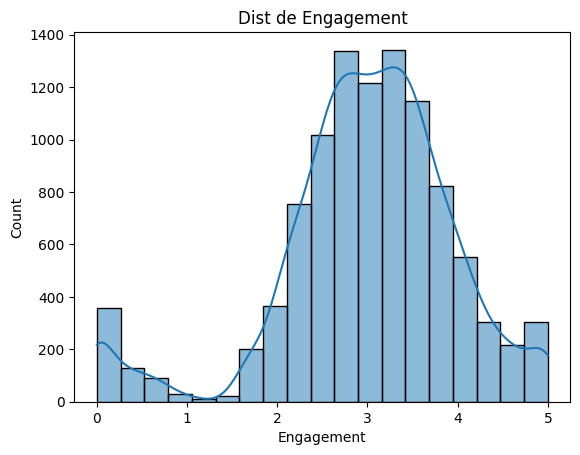

In [17]:
sns.histplot(data['Engagement'], bins=19, kde=True)
plt.title("Dist de Engagement")
plt.show()

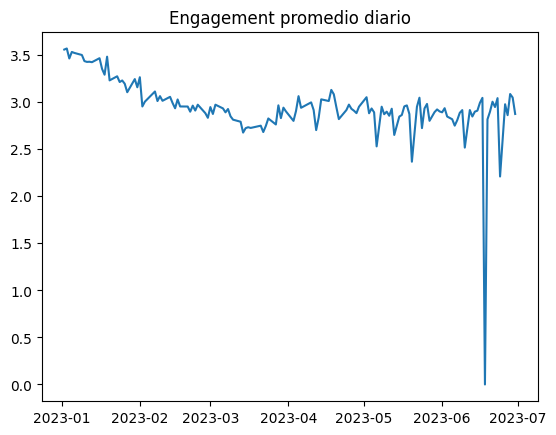

In [18]:
# Promedio diario por fecha
eng = (data.groupby('DateDT')['Engagement'].mean().reset_index())

plt.plot(eng['DateDT'], eng['Engagement'])
plt.title("Engagement promedio diario")
plt.show()

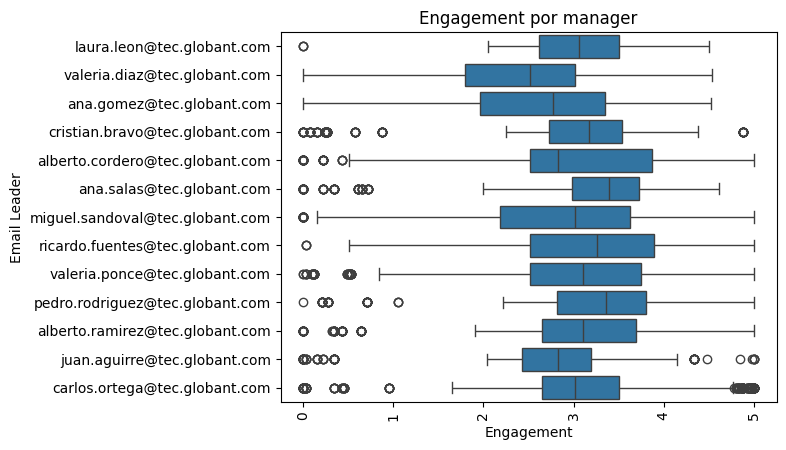

In [19]:
sns.boxplot(y="Email Leader", x='Engagement', data=data)
plt.title("Engagement por manager")
plt.xticks(rotation=90)
plt.show()

In [20]:
# Promedio por fecha y manager (semanal)
eng_mgr = (data.set_index('DateDT').groupby('Email Leader')['Engagement']
           .resample('W').mean().reset_index()) # W para que sea semanal (quitar ruido)


managers = eng_mgr['Email Leader'].unique()
palette = sns.color_palette("tab20", n_colors=len(managers))
color_map = dict(zip(managers, palette))

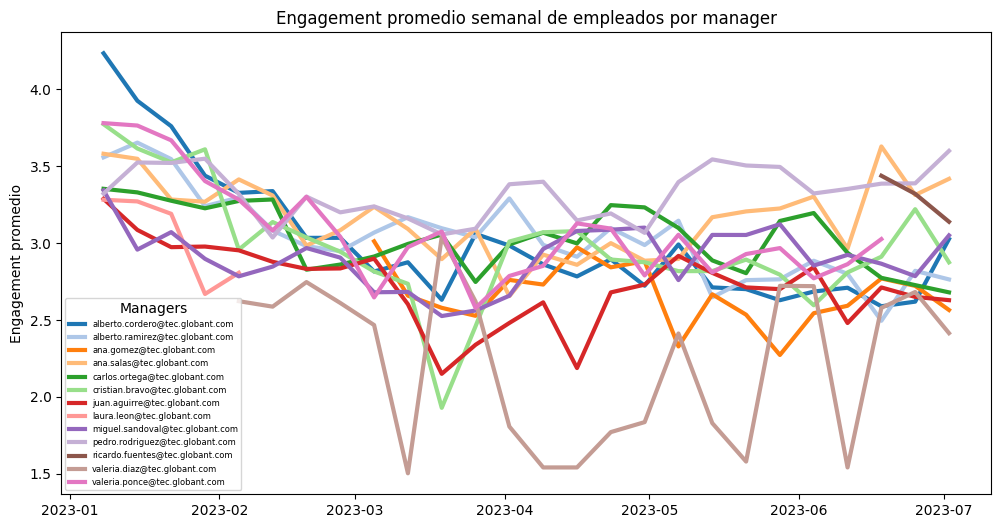

In [21]:
plt.figure(figsize=(12,6))

for mid, df_m in eng_mgr.groupby('Email Leader'):
    plt.plot(df_m['DateDT'], df_m['Engagement'], alpha=1, linewidth=3, color=color_map[mid], label=str(mid)) # para que no tape todo

plt.title("Engagement promedio semanal de empleados por manager")
plt.ylabel("Engagement promedio")
plt.legend(title="Managers", fontsize=6)
plt.show()

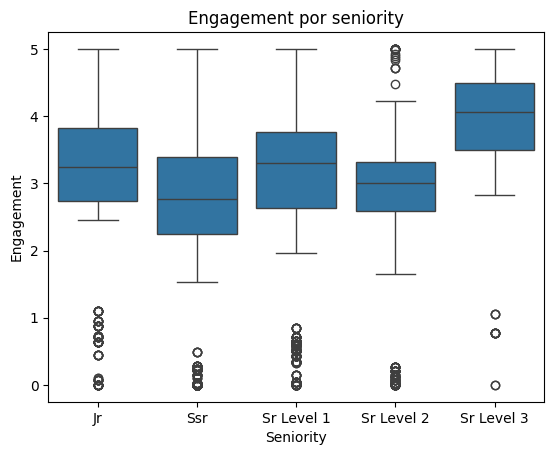

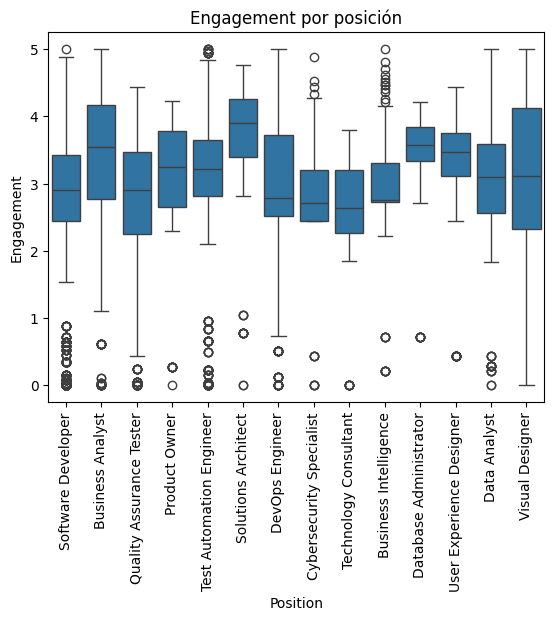

In [22]:
sns.boxplot(x='Seniority', y='Engagement', data=data)
plt.title("Engagement por seniority")
plt.show()

sns.boxplot(x='Position', y='Engagement', data=data)
plt.title("Engagement por posición")
plt.xticks(rotation=90)
plt.show()

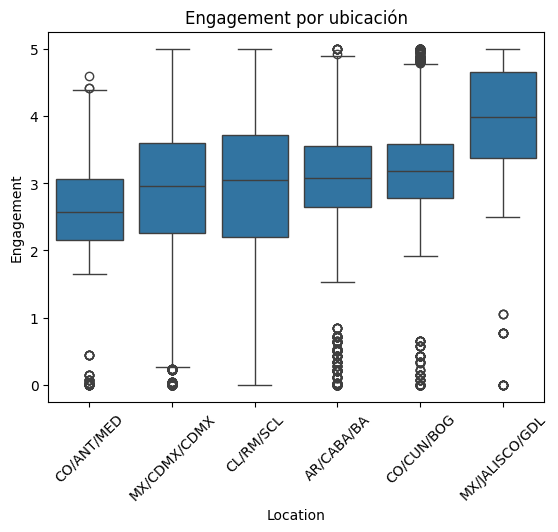

In [23]:
sns.boxplot(x='Location', y='Engagement', data=data)
plt.title("Engagement por ubicación")
plt.xticks(rotation=45)
plt.show()